# The M2 Model

The M2 model generalizes the VAE by learning the distribution of a dataset $\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_n$ given they are sampled conditioned on a latent $\mathbf{z}$ sampled as a standard Gaussian vector (like the VAE) and a categorical condition $c$. Below, we show an implementation of the M2 model of top of the standard VAE:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import random
from tqdm import tqdm
import torchvision
import torchvision.datasets as datasets

#for consistency, all seeds are set to 69420
seed = 69420
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

<Figure size 640x480 with 0 Axes>

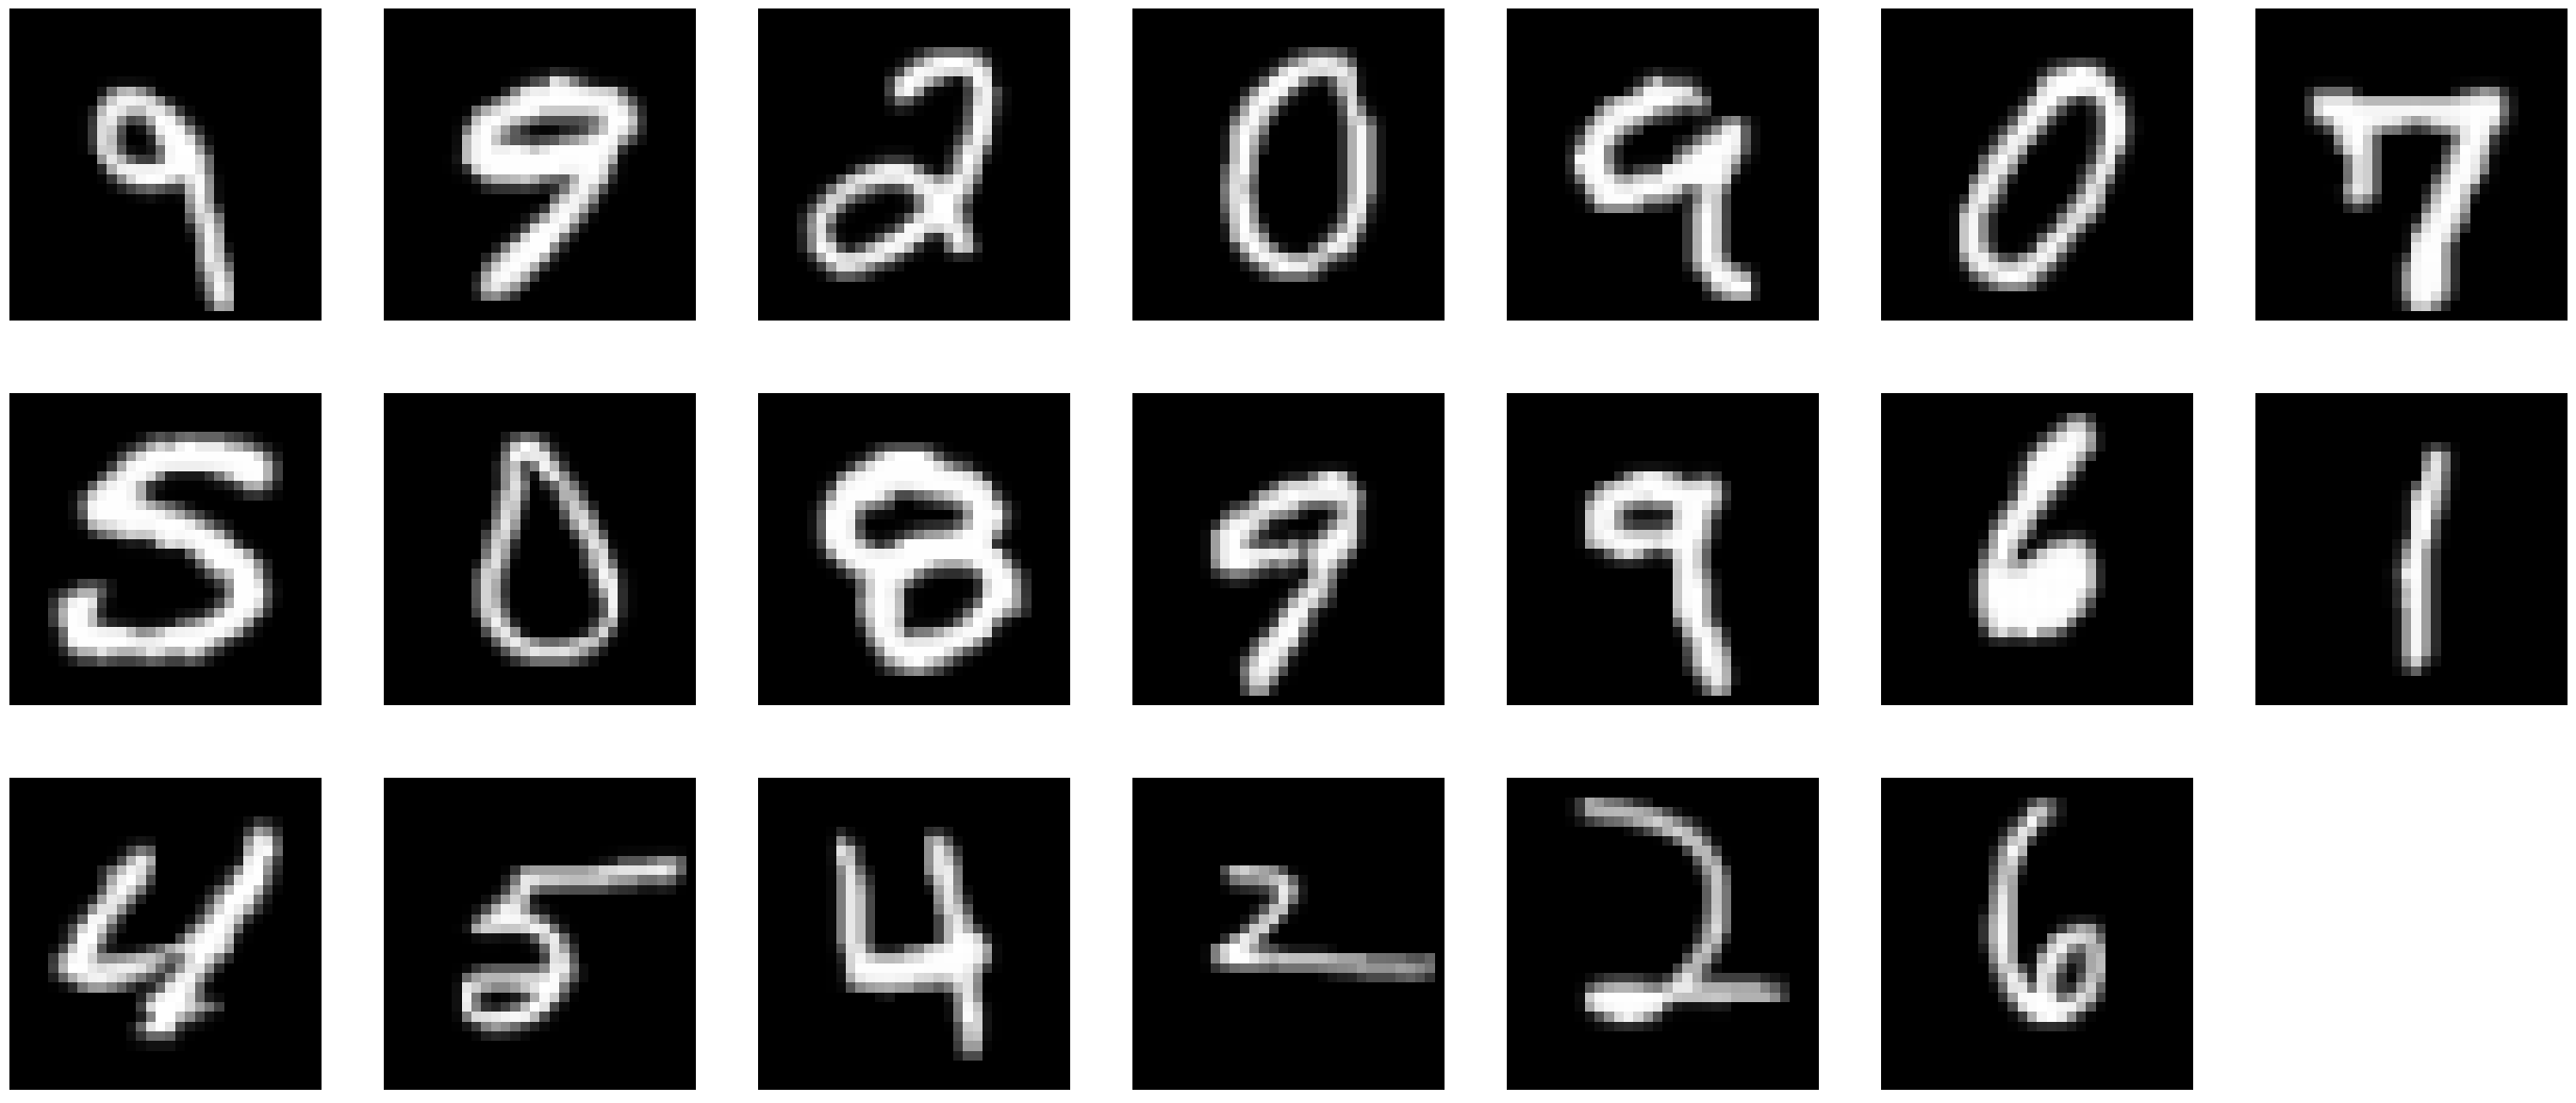

In [2]:
transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((32,32)),
    torchvision.transforms.ToTensor()
])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms)
data_loader = torch.utils.data.DataLoader(mnist_trainset,batch_size=128,shuffle=True,num_workers=1)

plt.gray()

def plotter(images):
    f = -(-len(images)//3)
    fig,ax = plt.subplots(3,f,figsize=(5*f, 15))
    for i in range(len(images)):
        ax[i%3,i//3].imshow(images[i,0])
    for aa in ax:
        for aaa in aa:
            aaa.axis("off")
    plt.show()

for a, b in data_loader:
    plotter(a[0:20])
    break